In [1]:
import numpy as np
import matplotlib.pyplot as plt 

1. Go to http://astroweb.cwru.edu/SPARC/ and under "BASIC SPARK DATA", download the zip file for "Newtonian Mass Models".
2. Open (extract/unzip) the zip file and choose a galaxy (any file) of your choice. Do not rename the file. Put the name of the chosen galaxy in the variable in the cell below and run it.

In [2]:
#Your_Galaxy='NGC0891' #for example: NGC0891
Your_Galaxy='NGC5005'

3. Make a note of the directory (file location) of the SPARC file of your galaxy **with respect to this location of this python notebook**. For example, if your file is located in the same location as this code, leave the following cell as is. But if it is, say, in the next folder "up" from this one, use the extension '../'. So an example of if the SPARC file is located two folders then one folder "down" (into a different folder named, say, 'otherfolder'), you would write:
`SPARC_file_directory='../../otherfolder/'` in the cell below and run it.

In [3]:
SPARC_file_directory='data/sparc/'                       #note that '' means the string variable is blank

In [4]:
# Define file path for .dat files
SPARC_File_Path = SPARC_file_directory + Your_Galaxy + '_rotmod.dat'

data = np.loadtxt(SPARC_File_Path)                      # Load data, skips the header
Rad,Vobs,errV,Vgas,Vdisk,Vbul,SBdisk,SBbul = data.T     # Split columns into arrays
print(Rad)

# Define distance in Mpc
firstline = open(SPARC_File_Path).readline()
firstline = firstline.split()
distance = float(firstline[3])

# Print header
for lines in open(SPARC_File_Path, 'r'):
    if lines.startswith('#'):
        print(lines)

[ 0.49  0.98  1.47  1.97  2.46  2.95  3.44  3.93  4.42  4.92  5.74  6.56
  7.37  8.19  9.01  9.83 10.65 11.47]
# Distance = 16.9 Mpc

# Rad	Vobs	errV	Vgas	Vdisk	Vbul	SBdisk	SBbul		

# kpc	km/s	km/s	km/s	km/s	km/s	L/pc^2	L/pc^2



## Plot observed velocity

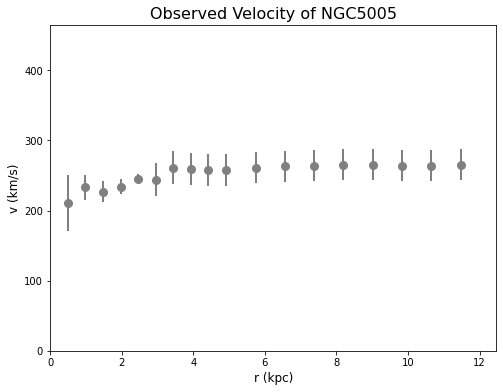

In [5]:
plt.figure(figsize=(8,6))
plt.errorbar(Rad,Vobs,yerr=errV, marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', linewidth=2)
plt.xlabel('r (kpc)',size=12)
plt.ylabel('v (km/s)',size=12)
plt.title(str('Observed Velocity of ' + Your_Galaxy), size=16)
plt.xlim(0,np.max(Rad + 1))
plt.ylim(0,np.max(Vobs + 200))
plt.show()

## Plot velocity of each component

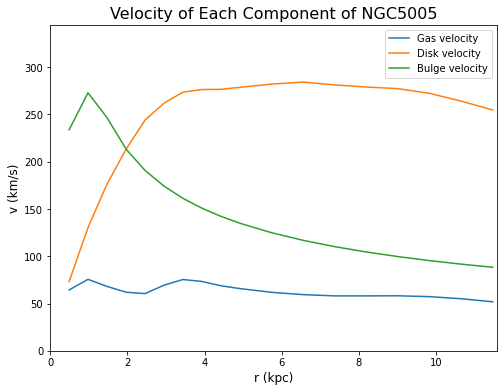

In [6]:
plt.figure(figsize=(8,6))
plt.plot(Rad,Vgas, label="Gas velocity")
plt.plot(Rad,Vdisk, label="Disk velocity")
plt.plot(Rad,Vbul, label="Bulge velocity")
plt.xlabel('r (kpc)',size=12)
plt.ylabel('v (km/s)',size=12)
plt.title(str('Velocity of Each Component of ' + Your_Galaxy), size=16)
plt.xlim(0,np.max(Rad + 0.1))
plt.ylim(0,np.max(Vobs + 80))
plt.legend()
plt.show()

## Total curve without dark matter

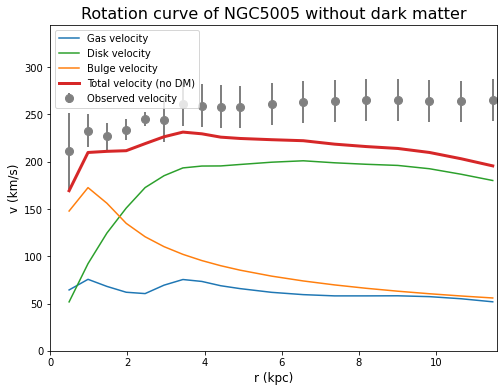

In [7]:
MLdisk = 0.5
MLbul = 0.4

total_noDM = np.sqrt(abs(Vgas)*Vgas + MLdisk*abs(Vdisk)*Vdisk + MLbul*abs(Vbul)*Vbul)      # pg 6 of the Lelli paper: http://adsabs.harvard.edu/abs/2016arXiv160609251L 

plt.figure(figsize=(8,6))
plt.plot(Rad,Vgas, label="Gas velocity", color='#1f77b4')
plt.plot(Rad,np.sqrt(MLdisk)*Vdisk, label="Disk velocity", color='#2ca02c')
plt.plot(Rad,np.sqrt(MLbul)*Vbul, label="Bulge velocity", color='#ff7f0e')
plt.plot(Rad,total_noDM, label="Total velocity (no DM)", color='#d62728', linewidth=3)
plt.errorbar(Rad,Vobs,yerr=errV, marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', linewidth=2, label = "Observed velocity")
plt.xlabel('r (kpc)',size=12)
plt.ylabel('v (km/s)',size=12)
plt.title(str('Rotation curve of ' + Your_Galaxy + ' without dark matter'), size=16)
plt.xlim(0,np.max(Rad + 0.1))
plt.ylim(0,np.max(Vobs) + 80)
plt.legend()
plt.show()

## Add dark matter

In [8]:
# Set parameters
rho0 = 3.10e8       # central mass density (in solar mass/kpc^3)
rc = 1.4            # core radius (in kpc)
G = 4.300e-6        # Gravitational constant (kpc/solar mass*(km/s)^2)

# Equation for dark matter halo velocity
def Vhalo(r,rho0,rc):
    v = np.sqrt(4*np.pi*G*rho0*rc**2*(1 - rc/r * np.arctan(r/rc)))
    return v

# Calculate total velocity with dark matter
total_withDM = lambda r,rho0,rc: np.sqrt(Vhalo(r,rho0,rc)**2 + abs(Vgas)*Vgas + MLdisk*abs(Vdisk)*Vdisk + MLbul*abs(Vbul)*Vbul)      # pg 6 of the Lelli paper: http://adsabs.harvard.edu/abs/2016arXiv160609251L 

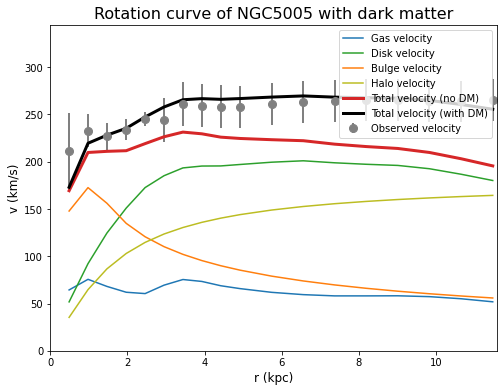

In [9]:
plt.figure(figsize=(8,6))
plt.plot(Rad,Vgas, label="Gas velocity", color='#1f77b4')
plt.plot(Rad,np.sqrt(MLdisk)*Vdisk, label="Disk velocity", color='#2ca02c')
plt.plot(Rad,np.sqrt(MLbul)*Vbul, label="Bulge velocity", color='#ff7f0e')
plt.plot(Rad,Vhalo(Rad,rho0,rc), label="Halo velocity", color='#bcbd22')
plt.plot(Rad,total_noDM, label="Total velocity (no DM)", color='#d62728', linewidth=3)
plt.plot(Rad,total_withDM(Rad,rho0,rc), label="Total velocity (with DM)", color='k', linewidth=3)
plt.errorbar(Rad,Vobs,yerr=errV, marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', linewidth=2, label = "Observed velocity")
plt.xlabel('r (kpc)',size=12)
plt.ylabel('v (km/s)',size=12)
plt.title(str('Rotation curve of ' + Your_Galaxy + ' with dark matter'), size=16)
plt.xlim(0,np.max(Rad + 0.1))
plt.ylim(0,np.max(Vobs) + 80)
plt.legend()
plt.show()

## Comparison with paper (just for 5005 - checking SPARC - this section will be removed)

In [10]:
import sys
sys.path.append('python/')
import load_galaxies as lg        # Load load_galaxies.py library

# Choose galaxy
galaxy = lg.NGC5005              # 'galaxy' now refers to your chosen galaxy

# Measured data
measured_data = galaxy['measured_data']

# Separate the columns of the data into arrays
m_radii = galaxy['m_radii']           # Radius
m_velocities = galaxy['m_velocities'] # Velocity
m_r_errors = galaxy['m_r_errors']     # Errors in radius
m_v_errors = galaxy['m_v_errors']     # Errors in velocity  

# Bulge
bulge_datathief = galaxy['bulge']['spline']   
# Disk
disk_datathief = galaxy['disk']['spline']
# Gas
gas_datathief = galaxy['gas']['spline']

# Total velocity with dark matter halo component
def total_v_datathief(r,rho0,rc):
    v = np.sqrt( bulge_datathief(r)**2        # bulge component
               + disk_datathief(r)**2         # disk component
               + gas_datathief(r)**2          # gas component
               + Vhalo(r,rho0,rc)**2)        # dark matter halo component
    return v

## Plot

#### Bulge

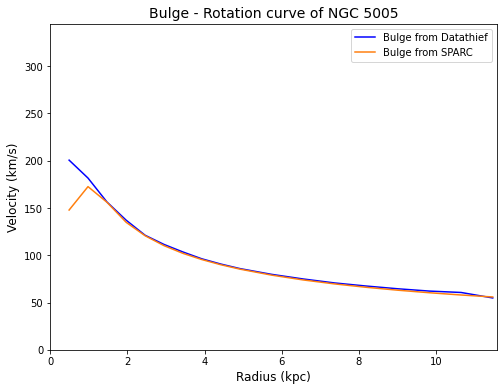

In [11]:
# Datathief
plt.figure(figsize=(8,6))                     # size of the plot
plt.plot(Rad, bulge_datathief(Rad), color='b', label='Bulge from Datathief')

# SPARC
plt.plot(Rad, np.sqrt(MLbul)*Vbul, label="Bulge from SPARC", color='#ff7f0e')

plt.title('Bulge - Rotation curve of {}'.format(galaxy['galaxyname']), fontsize=14)     # giving the plot a title
plt.xlabel('Radius (kpc)', fontsize=12)                           # labeling the x-axis
plt.ylabel('Velocity (km/s)', fontsize=12)                        # labeling the y-axis
plt.xlim(0,np.max(Rad + 0.1))
plt.ylim(0,np.max(Vobs) + 80)
plt.legend()
plt.show()

#### Disk

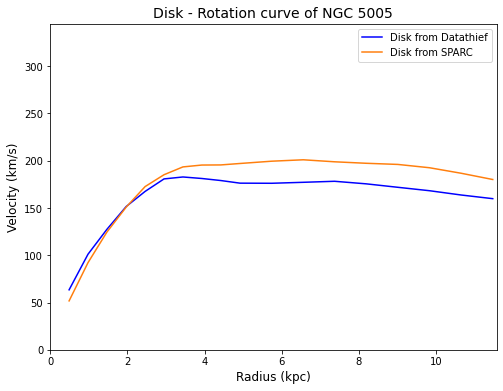

In [12]:
# Datathief
plt.figure(figsize=(8,6))                     # size of the plot
plt.plot(Rad, disk_datathief(Rad),  color='b', label='Disk from Datathief')                        

# SPARC
plt.plot(Rad, np.sqrt(MLdisk)*Vdisk, label="Disk from SPARC", color='#ff7f0e')

plt.title('Disk - Rotation curve of {}'.format(galaxy['galaxyname']), fontsize=14)     # giving the plot a title
plt.xlabel('Radius (kpc)', fontsize=12)                           # labeling the x-axis
plt.ylabel('Velocity (km/s)', fontsize=12)                        # labeling the y-axis
plt.xlim(0,np.max(Rad + 0.1))
plt.ylim(0,np.max(Vobs) + 80)
plt.legend()
plt.show()

#### Gas

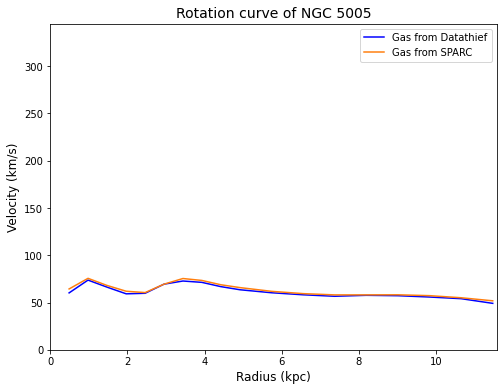

In [13]:
# Datathief
plt.figure(figsize=(8,6))                     # size of the plot
plt.plot(Rad, gas_datathief(Rad),   color='b', label='Gas from Datathief')            

# SPARC
plt.plot(Rad,Vgas, label="Gas from SPARC", color='#ff7f0e')

plt.title('Rotation curve of {}'.format(galaxy['galaxyname']), fontsize=14)     # giving the plot a title
plt.xlabel('Radius (kpc)', fontsize=12)                           # labeling the x-axis
plt.ylabel('Velocity (km/s)', fontsize=12)                        # labeling the y-axis
plt.xlim(0,np.max(Rad + 0.1))
plt.ylim(0,np.max(Vobs) + 80)
plt.legend()
plt.show()

#### Total curve with dark matter

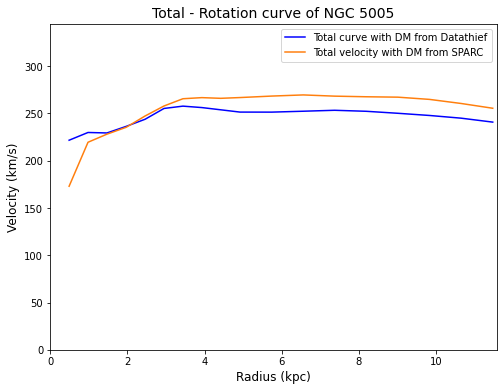

In [14]:
# Datathief
plt.figure(figsize=(8,6))                     # size of the plot
plt.plot(Rad, total_v_datathief(Rad,rho0,rc), color='b', label='Total curve with DM from Datathief')

# SPARC
plt.plot(Rad,total_withDM(Rad,rho0,rc), label="Total velocity with DM from SPARC", color='#ff7f0e')

plt.title('Total - Rotation curve of {}'.format(galaxy['galaxyname']), fontsize=14)     # giving the plot a title
plt.xlabel('Radius (kpc)', fontsize=12)                           # labeling the x-axis
plt.ylabel('Velocity (km/s)', fontsize=12)                        # labeling the y-axis
plt.xlim(0,np.max(Rad + 0.1))
plt.ylim(0,np.max(Vobs) + 80)
plt.legend()
plt.show()

#### Measured points

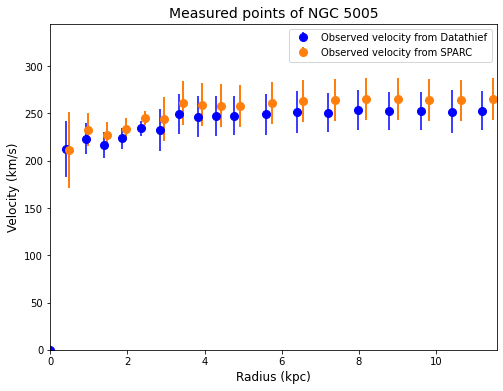

In [15]:
# Datathief
plt.figure(figsize=(8,6))                     # size of the plot
plt.errorbar(m_radii,m_velocities,yerr=m_v_errors, marker='o', markersize=8, \
             linestyle='none', color='b', label = "Observed velocity from Datathief")

# SPARC
plt.errorbar(Rad,Vobs,yerr=errV, marker='o', markersize=8, \
             color='#ff7f0e', linestyle='none', linewidth=2, label = "Observed velocity from SPARC")

plt.title('Measured points of {}'.format(galaxy['galaxyname']), fontsize=14)     # giving the plot a title
plt.xlabel('Radius (kpc)', fontsize=12)                           # labeling the x-axis
plt.ylabel('Velocity (km/s)', fontsize=12)                        # labeling the y-axis
plt.xlim(0,np.max(Rad + 0.1))
plt.ylim(0,np.max(Vobs) + 80)
plt.legend()
plt.show()